## Q1. Housing Price (SVM/SVC)

#### Load and Explore the Data

*   Think about standardizing the data.

*  How would you replace discrete attributes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stat
import math

In [3]:
url = "https://drive.google.com/uc?id=1sEtgeWi0lZHFEBvuTi1DcoeqF7TZ-iE1"
df = pd.read_csv(url)
df.head()

,area,land,year,price,bldtype
0,2607,1200,2010,825000.0,0
1,1950,1783,1899,1685000.0,0
2,2520,1875,1899,1100000.0,0
3,3750,3125,1931,1200000.0,1
4,7812,5021,1908,1900000.0,1


In [4]:
Y = df['bldtype']
X = df.drop(['bldtype'], axis = 1)

#### Corelation Map to check co-relation between independent variables.

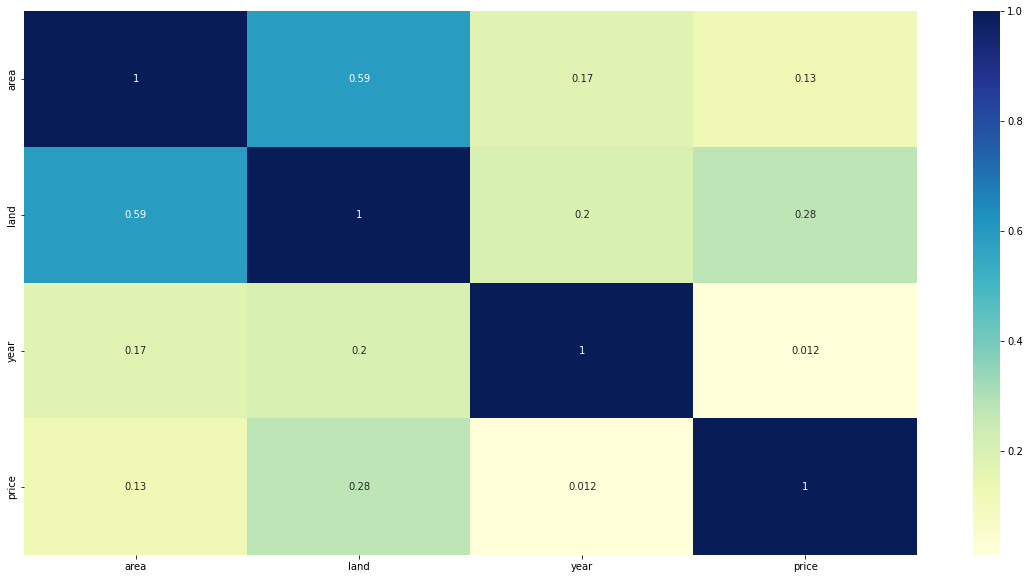

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

#### Train-Test Splot 80/20

In [6]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, columns=["year"])
Y = df['bldtype'].to_numpy()
X = df.drop(['bldtype'], axis = 1).to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size=0.8, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain[:,:3] = sc.fit_transform(Xtrain[:,:3])
Xtest[:,:3] = sc.transform(Xtest[:,:3])

#### Train a linear model with soft margin



*   Try with initial value of C=1



In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1) 
classifier.fit(Xtrain, Ytrain)
Ypred = classifier.predict(Xtest)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(Ytest, Ypred)
print(cm)
print(accuracy_score(Ytest, Ypred)*100)
print(classification_report(Ytest,Ypred))

[[13  0]
 [ 0  6]]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



#### Use cross validation to find best value of C



*   Can do it manually or use GridSearchCV

*   Divide the training set into train+validation



In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'C': list(np.logspace(-5,5, num=100)),'kernel':['linear']}  

gridSVM = GridSearchCV(SVC(), param_grid, return_train_score=False, cv=5) 
   
# fitting the model for grid search 
gridSVM.fit(Xtrain, Ytrain) 

# print best parameter after tuning 
print(gridSVM.best_params_) 
Ypred = gridSVM.predict(Xtest) 
print(accuracy_score(Ytest,Ypred)*100)

{'C': 2.848035868435799, 'kernel': 'linear'}
100.0


In [12]:
df = pd.DataFrame({"GroundTruth": Ytest, "Predict": Ypred})
df

,GroundTruth,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


#### Analyse accuracy basis the new values you have computed

We see that we acheived 100% accuracy in the first attempt with C=1 and Linear Kernel. Even using GridSearch CV to find the hyperparameters gave same test accuracy

## Q2. DT and RF

Consider the Wisconsin Breast Cancer dataset available from
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
(Diagnostic)

The dataset has 32 attributes that predict malignancy. There are a
total of 569 data patterns. Use 5-fold cross-validation. 


1.   Use Keras or any other framework to construct a decision tree from the training data and obtain the performance on the test data

2.   Construct a random forest (of say, 100 trees) from the training data and use the random forest to obtain the performance on the test data

3. Compare the performance you obtain in 1 and 2


In [40]:
HEADER = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
          'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
          'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
          'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names=HEADER)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
Xc = df.drop(labels=['id', 'diagnosis'], axis=1)
Yc = df['diagnosis']

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xc, Yc, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Practically, we would limit the size of Tree. But the data is small, so going
# untill we find pure leafs, or leafs with less than minimum number of samples.

# Since we don't have any hyper parameters, no Grid Search is being performed.

# To get better accuracy we will average the accuracy over 5 random states
accuracy_sum = 0
for i in [42,7,99,111,0]:
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = i) 
    classifier.fit(Xtrain, Ytrain)
    y_pred = classifier.predict(Xtest)
    accuracy_sum += accuracy_score(Ytest.values,y_pred)
    print(f"Accuracy for Random State {i}: {accuracy_score(Ytest.values,y_pred)*100}%")
print("\nAverage Accuracy: ", accuracy_sum/5 * 100)

Accuracy for Random State 42: 94.73684210526315%
Accuracy for Random State 7: 94.73684210526315%
Accuracy for Random State 99: 94.73684210526315%
Accuracy for Random State 111: 94.73684210526315%
Accuracy for Random State 0: 95.6140350877193%

Average Accuracy:  94.91228070175438


Random Trees

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42) 
classifierRF.fit(Xtrain, Ytrain)
y_pred = classifierRF.predict(Xtest)

print("Accuracy Score: ",accuracy_score(Ytest.values,y_pred)*100)

Accuracy Score:  96.49122807017544


In [18]:
param_grid = {'n_estimators': [i for i in range(50,150)]}  
   
gridRF = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state= 42), param_grid, return_train_score=False, cv=5) 
   
# fitting the model for grid search 
gridRF.fit(Xtrain, Ytrain) 


# print best parameter after tuning 
print("The Best Number of Estimator based on CV Search is: ",gridRF.best_params_['n_estimators']) 
Ypred = gridRF.predict(Xtest)
print(f"The Final Test Accuracy with using {gridRF.best_params_['n_estimators']} estimators is {accuracy_score(Ytest.values,Ypred)*100}%")

The Best Number of Estimator based on CV Search is:  91
The Final Test Accuracy with using 91 estimators is 96.49122807017544%


####  Repeat the exercise but add ±10% noise to 25% of the data (Optional)

### Boosting

Implement a boosting classifier algorithm for the same dataset as above (sample without noise)

Feel free to use any boosting algorithm you want

However only run the code for the eventual algorithm you choose and comment out every other algorithm

Briefly explain why you chose a particular algorithm

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1)
Ypred = ab_classifier.fit(Xtrain,Ytrain).predict(Xtest)

print("AdaBoosted Accuracy: ", accuracy_score(Ytest, Ypred)*100)

AdaBoosted Accuracy:  97.36842105263158


### Using different base learners

In [20]:
# Base Learner - Vanilla Decision Tree
ab_classifier = AdaBoostClassifier(n_estimators=100, base_estimator=classifier, learning_rate=1)
Ypred = ab_classifier.fit(Xtrain,Ytrain).predict(Xtest)

print("Using Decision Tree Classifier as Base Learner for Boosting, Accuracy: ", accuracy_score(Ytest, Ypred)*100)

Using Decision Tree Classifier as Base Learner for Boosting, Accuracy:  94.73684210526315


In [21]:
# Base Learner - Random Forest
ab_classifier = AdaBoostClassifier(n_estimators=100, base_estimator=classifierRF, learning_rate=1)
Ypred = ab_classifier.fit(Xtrain,Ytrain).predict(Xtest)

print("Using Decision Tree Classifier as Base Learner for Boosting, Accuracy: ", accuracy_score(Ytest, Ypred)*100)

Using Decision Tree Classifier as Base Learner for Boosting, Accuracy:  96.49122807017544


##### AdaBoost gave the better results, due to it's focus on giving more weights to the data points which are mis-classified in the initial stages and increasing it's probability. Also in Ada Boost when using trees, we never go for the feature with highest information gain, rather we have a subset of which we select the best, focusing more on generalization rather than just overfitting on training data.

### Bagging

Implement a bagging classifier on the RF you created above


> from sklearn.ensemble import BaggingClassifier

You will have to pass the DT into the Bagging Classifier

Once you have the y_pred for Bagging and RF, accurately compute the accuracy by computing the numpy sum where pred(bagging) == pred(RF) and divide by len(pred(bagging))

Please provide rationale behind why this is done.



In [37]:
from sklearn.ensemble import BaggingClassifier

classifierBag = BaggingClassifier(base_estimator=classifierRF, n_estimators=100)
classifierBag.fit(Xtrain,Ytrain)
bag_pred = classifierBag.predict(Xtest)
print("Accuracy of Bagging Classifier with Base Estimator as Decision Tree: ", accuracy_score(Ytest,bag_pred)*100)

Accuracy of Bagging Classifier with Base Estimator as Decision Tree:  96.49122807017544


In [44]:
dt_result = classifier.predict(Xtest)
bagging_result = classifierBag.predict(Xtest)
matching = np.sum(dt_result == bagging_result)
print("Number of Prediction which both the models predicted same: ", matching)
print("Matching Percentage: ", matching/len(dt_result)*100)

Number of Prediction which both the models predicted same:  113
Matching Percentage:  99.12280701754386


##### We are doing this to see how many data points more did the bagging was able to classify differently from vanilla decision tree. Since Bagging technique involved repeatedly executing the algortihm with different set of the dataset, it has more robustness.

Bonus : While you are looking at ensemble models, explore VotingClassifier

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', max_iter = 10_000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

classifiedHard = VotingClassifier(estimators = estimator, voting ='hard')
Ypred = classifiedHard.fit(Xtrain, Ytrain).predict(Xtest)

print("Accuracy of Ensemble Model with Hard Voting: ", accuracy_score(Ytest,Ypred)*100)

Accuracy of Ensemble Model with Hard Voting:  96.49122807017544


In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers.

In soft voting, the output class is the prediction based on the average of probability given to that class.

In [47]:
classifiedSoft = VotingClassifier(estimators = estimator, voting ='soft')
Ypred = classifiedSoft.fit(Xtrain, Ytrain).predict(Xtest)

print("Accuracy of Ensemble Model with Hard Voting: ", accuracy_score(Ytest,Ypred)*100)

Accuracy of Ensemble Model with Hard Voting:  97.36842105263158
